In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 계층적 군집분석

In [3]:
from sklearn.cluster import AgglomerativeClustering

In [4]:
x, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(x)

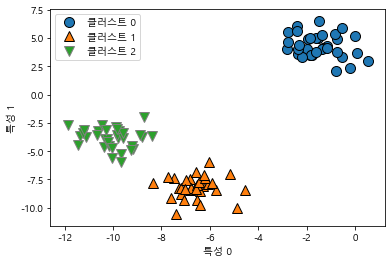

In [6]:
mglearn.discrete_scatter(x[:,0], x[:,1], assignment)
plt.legend(['클러스트 0', '클러스트 1', '클러스트 2'], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

In [8]:
from scipy.cluster.hierarchy import dendrogram, ward

Text(0, 0.5, '클러스터 거리')

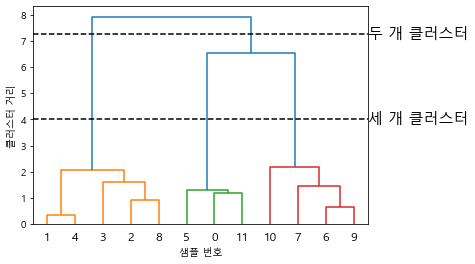

In [10]:
x, y = make_blobs(random_state=0, n_samples=12)

#데이터 배열 x에 ward 함수를 적용해줘야함
#거리정보가 담긴 배열을 리턴해줌
linkage_array = ward(x)
#클러스터간의 거리 정보가 담긴 linkage_array를 사용해 댄드로그램
dendrogram(linkage_array)

#두 개 or 세 개의 클러스터로 구분 --> 클러스트 구분 라인 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')

ax.text(bounds[1], 7.25, '두 개 클러스터', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, '세 개 클러스터', va='center', fontdict={'size':15})
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')

### DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

x, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN() #밀도를 통해 데이터 군집이므로 따로 하이퍼파라미터 설정안함, 자기가 알아서 나눠줌
cluster = dbscan.fit_predict(x)

print('클러스터 레이블:\n',cluster) #아직 군집분석 안됨(숫자가 작거나 군집이 안되는 모양이거나)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [16]:
x, y = make_moons(random_state=0, n_samples=200, noise=0.05)
#스케일링
scaler = StandardScaler() #평균0, 분산1로 변환
x_scaled = scaler.fit_transform(x)

#dbscan
dbscan = DBSCAN()
#학습, 변환 동시에
cluster = dbscan.fit_predict(x_scaled)

In [17]:
print('클러스터 레이블:\n', cluster)

클러스터 레이블:
 [0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


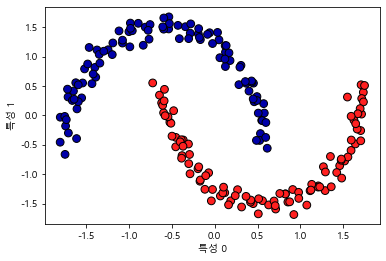

In [19]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=cluster, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()